Original Shape: (8807, 12)
Missing values before cleaning:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
✅ Cleaned dataset saved as 'netflix_titles_cleaned.csv'


C:\Users\dell\AppData\Local\Temp\ipykernel_16804\1670967435.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


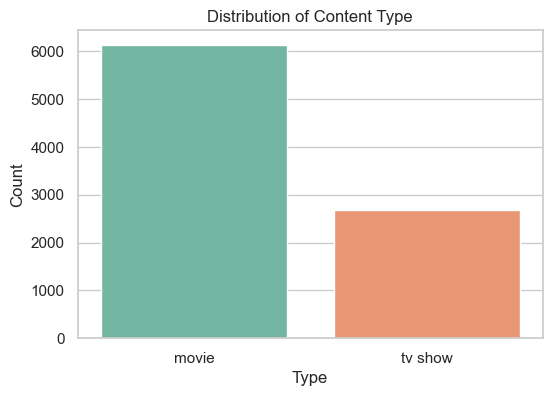

C:\Users\dell\AppData\Local\Temp\ipykernel_16804\1670967435.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set3')


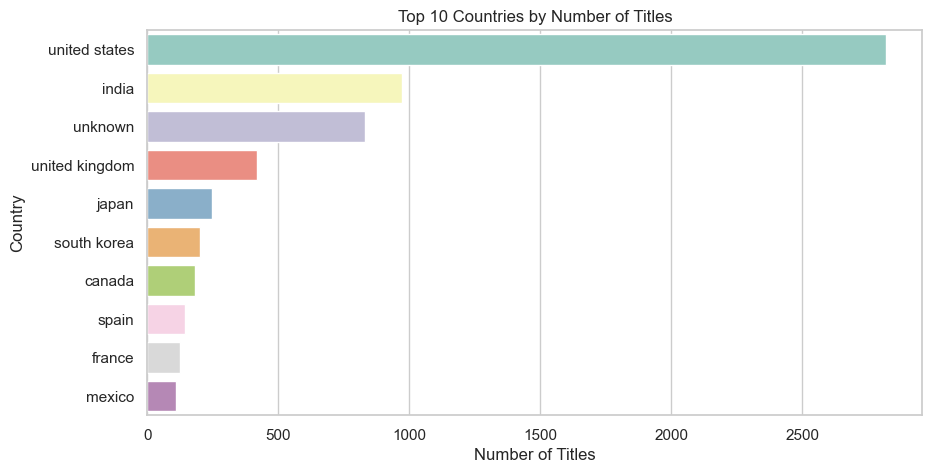

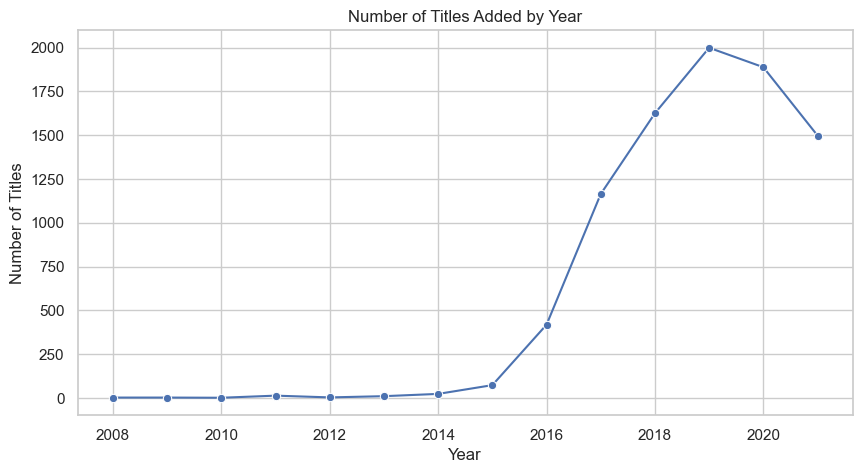

In [7]:
# ---------------------------------------------
# Step 1: Import necessary libraries
# ---------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# Step 2: Load the dataset
# ---------------------------------------------
df = pd.read_csv("netflix_titles.csv")  # Make sure the file is in the same directory or provide full path

# ---------------------------------------------
# Step 3: Inspect the dataset
# ---------------------------------------------
print("Original Shape:", df.shape)
print("Missing values before cleaning:\n", df.isnull().sum())

# ---------------------------------------------
# Step 4: Rename column headers (lowercase, no spaces)
# ---------------------------------------------
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# ---------------------------------------------
# Step 5: Remove duplicate rows
# ---------------------------------------------
df.drop_duplicates(inplace=True)

# ---------------------------------------------
# Step 6: Handle missing values
# ---------------------------------------------
df['country'] = df['country'].fillna('unknown')
df['rating'] = df['rating'].fillna('not rated')
df['director'] = df['director'].fillna('not specified')
df['cast'] = df['cast'].fillna('not specified')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])  # Most frequent date

# ---------------------------------------------
# Step 7: Convert date formats
# ---------------------------------------------
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# ---------------------------------------------
# Step 8: Standardize text columns
# ---------------------------------------------
text_columns = ['type', 'title', 'director', 'cast', 'country', 'rating']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# ---------------------------------------------
# Step 9: Check and fix data types
# ---------------------------------------------
df['release_year'] = df['release_year'].astype(int)

# ---------------------------------------------
# Step 10: Save the cleaned dataset
# ---------------------------------------------
df.to_csv("netflix_titles_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'netflix_titles_cleaned.csv'")

# ---------------------------------------------
# Step 11: Basic visualizations (Optional)
# ---------------------------------------------
sns.set(style="whitegrid")

# Plot 1: Type of content
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribution of Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Plot 2: Top 10 countries with most content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set3')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

# Plot 3: Titles added by year
df['year_added'] = df['date_added'].dt.year
yearly = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
plt.title("Number of Titles Added by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()
